In [23]:
import pandas as pd

In [24]:
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')

print(summer.shape)
print(winter.shape)

(31165, 9)
(5770, 9)


In [25]:
summer['Season'] = "Summer"
winter['Season'] = 'Winter'

In [26]:
olympics = pd.concat([summer,winter], ignore_index=True)
print(olympics.shape)

(36935, 10)


In [27]:
olympics.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
Season        0
dtype: int64

In [28]:
olympics = olympics.dropna(subset=['Country'])
olympics.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
Season        0
dtype: int64

In [29]:
deduped = olympics.drop_duplicates(
    subset=["Year", "Season", "Event", "Country", "Medal"]
)


In [30]:
country_medals = deduped.groupby(['Country', 'Year', 'Season', 'Medal']).size().reset_index(name='Count')

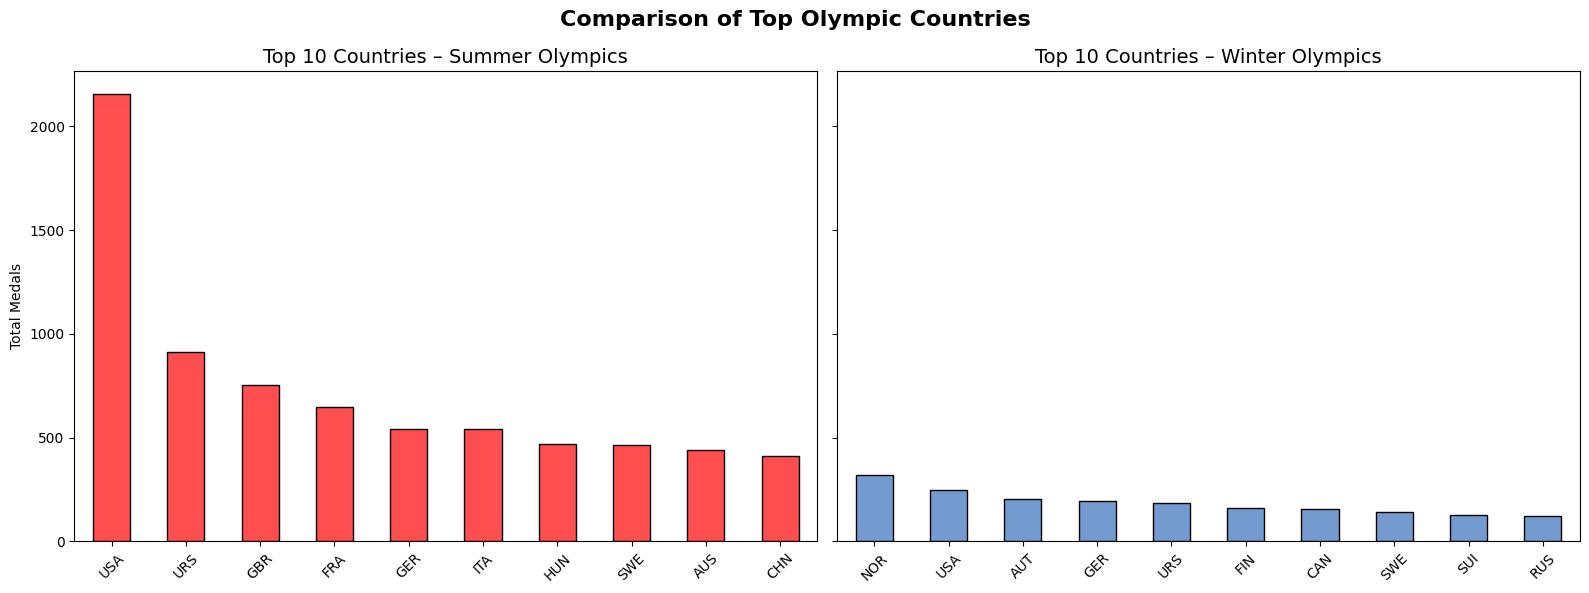

In [33]:
import matplotlib.pyplot as plt

summer_top = (
    deduped[deduped["Season"]=="Summer"]
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

winter_top = (
    deduped[deduped["Season"]=="Winter"]
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

summer_top.plot(kind="bar", ax=axes[0], color="#ff4e50", edgecolor="black")
axes[0].set_title("Top 10 Countries – Summer Olympics", fontsize=14)
axes[0].set_ylabel("Total Medals")
axes[0].set_xlabel("")
axes[0].tick_params(axis="x", rotation=45)

winter_top.plot(kind="bar", ax=axes[1], color="#739BD0", edgecolor="black")
axes[1].set_title("Top 10 Countries – Winter Olympics", fontsize=14)
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].tick_params(axis="x", rotation=45)

fig.suptitle("Comparison of Top Olympic Countries", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig('../dataminingproject1/charts/stackedbar_totalmedals.png', dpi=300, bbox_inches='tight')
plt.show()



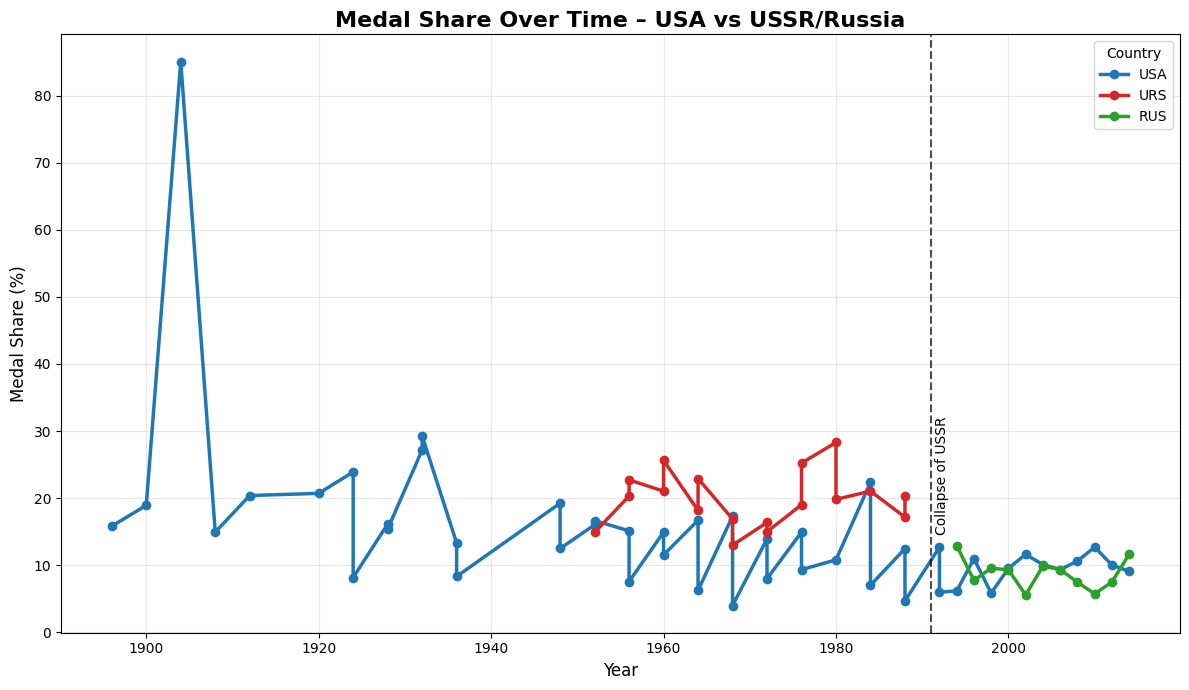

In [35]:
total_by_year = deduped.groupby(["Year","Season"])["Medal"].count().reset_index(name="Total")

country_by_year = (
    deduped[deduped["Country"].isin(["USA","URS","RUS"])]
    .groupby(["Year","Season","Country"])["Medal"].count()
    .reset_index(name="Medals")
)

merged = country_by_year.merge(total_by_year, on=["Year","Season"])
merged["Share"] = (merged["Medals"]/merged["Total"]) * 100

plt.figure(figsize=(12,7))

colors = {"USA": "#1f77b4", "URS": "#d62728", "RUS": "#2ca02c"}

for c in ["USA","URS","RUS"]:
    subset = merged[merged["Country"]==c]
    plt.plot(subset["Year"], subset["Share"], marker="o", linewidth=2.5, 
             label=c, color=colors[c])

plt.axvline(x=1991, color="black", linestyle="--", alpha=0.7)
plt.text(1991+0.5, 15, "Collapse of USSR", rotation=90, color="black")

plt.title("Medal Share Over Time – USA vs USSR/Russia", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Medal Share (%)", fontsize=12)
plt.legend(title="Country")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../dataminingproject1/charts/linechart_totalmedalsovertime.png', dpi=300, bbox_inches='tight')
plt.show()



C:\Users\keato\AppData\Local\Temp\ipykernel_8512\4108556039.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deduped["Continent"] = deduped["Country"].map(continent_map)


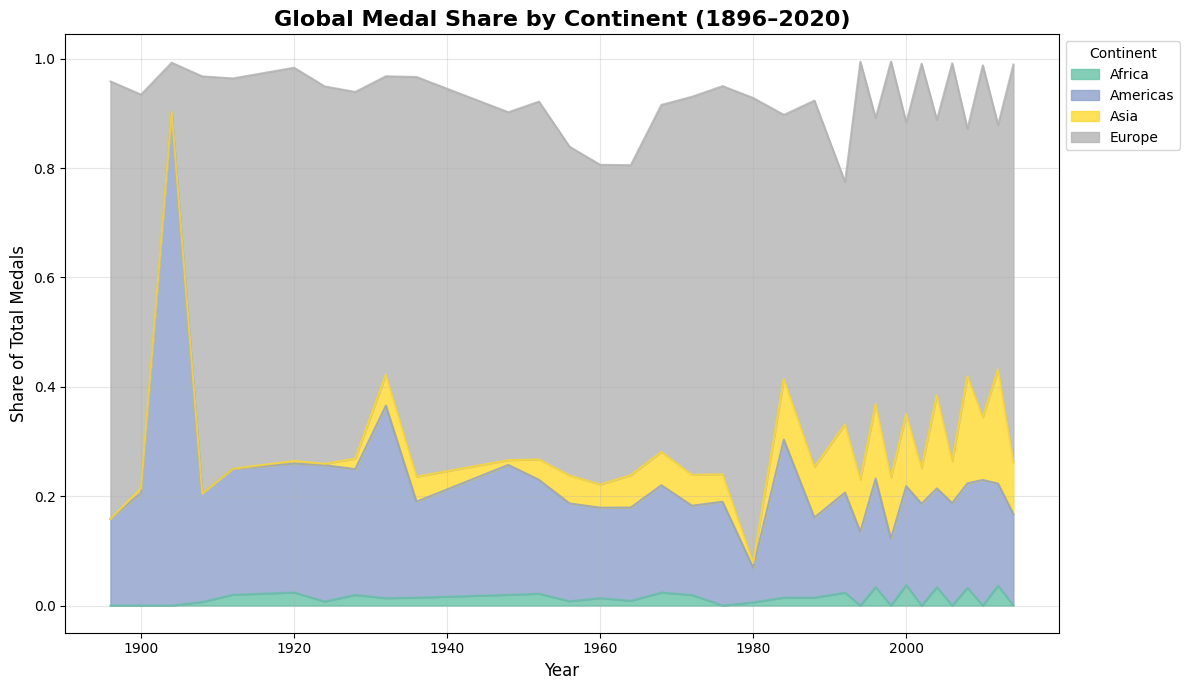

In [34]:
continent_map = {
    # Americas
    "USA": "Americas", "CAN": "Americas", "BRA": "Americas", "MEX": "Americas",
    "ARG": "Americas", "CUB": "Americas", "JAM": "Americas", "COL": "Americas",
    "URU": "Americas", "CHI": "Americas", "VEN": "Americas",
    
    # Europe
    "URS": "Europe", "RUS": "Europe", "GER": "Europe", "FRG": "Europe", "GDR": "Europe",
    "GBR": "Europe", "ITA": "Europe", "FRA": "Europe", "ESP": "Europe", "SWE": "Europe",
    "NOR": "Europe", "FIN": "Europe", "POL": "Europe", "CZE": "Europe", "SVK": "Europe",
    "NED": "Europe", "SUI": "Europe", "BEL": "Europe", "HUN": "Europe", "ROU": "Europe",
    "BUL": "Europe", "DEN": "Europe", "GRE": "Europe", "AUT": "Europe", "CRO": "Europe",
    "UKR": "Europe", "BLR": "Europe", "EST": "Europe", "LAT": "Europe", "LTU": "Europe",
    "SRB": "Europe", "SLO": "Europe", "MDA": "Europe",
    
    # Asia
    "CHN": "Asia", "JPN": "Asia", "KOR": "Asia", "IND": "Asia", "THA": "Asia",
    "IRI": "Asia", "KAZ": "Asia", "UZB": "Asia", "MGL": "Asia", "VIE": "Asia",
    "MAS": "Asia", "PHI": "Asia", "SGP": "Asia", "INA": "Asia",
    
    # Africa
    "RSA": "Africa", "KEN": "Africa", "ETH": "Africa", "NGR": "Africa", "EGY": "Africa",
    "TUN": "Africa", "MAR": "Africa", "ALG": "Africa", "CMR": "Africa",
    
}


deduped["Continent"] = deduped["Country"].map(continent_map)

share_by_continent = (
    deduped.groupby(["Year","Continent"])["Medal"].count()
    .reset_index()
)

total_by_year = deduped.groupby("Year")["Medal"].count().reset_index(name="Total")
share_by_continent = share_by_continent.merge(total_by_year, on="Year")
share_by_continent["Share"] = share_by_continent["Medal"]/share_by_continent["Total"]

pivot = share_by_continent.pivot(index="Year", columns="Continent", values="Share").fillna(0)

ax = pivot.plot(kind="area", stacked=True, figsize=(12,7), alpha=0.8,
                colormap="Set2")

plt.title("Global Medal Share by Continent (1896–2020)", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Share of Total Medals", fontsize=12)

plt.legend(title="Continent", loc="upper left", bbox_to_anchor=(1,1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../dataminingproject1/charts/areachart_totalshareofmedals.png', dpi=300, bbox_inches='tight')
plt.show()
